Gunakan data scanner_data.csv untuk RFM Analysis!

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn .preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df=pd.read_csv('/content/gdrive/MyDrive/MBKM Data Scientist/scanner_data.csv')
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


Apakah terdapat missing value dalam data?

In [6]:
df.isnull().sum()

Unnamed: 0        0
Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64

In [11]:
df.describe()

,Unnamed: 0,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,12386.450367,32389.604187,1.485311,11.981524
std,38020.391614,6086.447552,18709.901238,3.872667,19.359699
min,1.000000,1.000000,1.000000,0.010000,0.020000
25%,32927.250000,7349.000000,16134.000000,1.000000,4.230000
50%,65853.500000,13496.000000,32620.000000,1.000000,6.920000
75%,98779.750000,17306.000000,48548.000000,1.000000,12.330000
max,131706.000000,22625.000000,64682.000000,400.000000,707.730000


Apakah ada data yang minus? Gunakan data yang bernilai positif untuk analysis ya!

Tidak ada data yang minus dalam data yang digunakan

Hilangkan kolom No!

Lakukan eksplor data experiment mengenai jumlah transaksi, banyaknya produk dan jumlah customer yang ada!

In [12]:
data1 = pd.DataFrame([{'products':len(df['Sales_Amount'].value_counts()),
'transactions': len(df['Transaction_ID'].value_counts()),
'customers': len(df['Customer_ID'].value_counts()),}], 
columns = ['products', 'transactions', 'customers'], index = ['quantity'])
print(data1)

          products  transactions  customers
quantity      3233         64682      22625


Apakah kolom data sudah memiliki tipe data yang sesuai? Jika belum, ubahlah dulu tipe datanya agar sesuai.

In [25]:
import datetime as dt
now = dt.date(2016,12,31)

In [26]:
df['date'] = pd.DatetimeIndex(df.Date).date

In [27]:
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,date
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,2016-02-01
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,2016-02-01
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,2016-02-01
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,2016-02-01
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,2016-02-01


Kapan terakhir ada transaksi?

In [28]:
df['date'].max()

datetime.date(2016, 12, 31)

Lakukan RFM Analysis!
Bagaimana recency pelanggan?

In [44]:
recency_df = df.groupby(['Customer_ID'],as_index=False)['date'].max()
recency_df.columns = ['Customer_ID','LastPurchaseDate']
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)
recency_df.head()

,Customer_ID,LastPurchaseDate,Recency
0,1,2016-01-22,344
1,2,2016-06-19,195
2,3,2016-02-01,334
3,4,2016-11-07,54
4,5,2016-09-02,120


Customer ID 1 melakukan pembelian terakhir pada tanggal 22 januari 2016

In [45]:
recency_df.head()

,Customer_ID,LastPurchaseDate,Recency
0,1,2016-01-22,344
1,2,2016-06-19,195
2,3,2016-02-01,334
3,4,2016-11-07,54
4,5,2016-09-02,120


Bagaimana frequency pelanggan?

In [37]:
frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['Customer_ID','Transaction_ID'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('Customer_ID',as_index=False)['Transaction_ID'].count()
frequency_df.columns = ['Customer_ID','Frequency']
frequency_df.head()

,Customer_ID,Frequency
0,1,1
1,2,2
2,3,1
3,4,2
4,5,5


Bagaimana monetary pelanggan?

In [33]:
df['Total_cost'] = df['Sales_Amount'] * df['Quantity']

In [34]:
monetary_df=df.groupby('Customer_ID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['Customer_ID','Monetary']
monetary_df.head()

,Customer_ID,Monetary
0,1,16.29
1,2,22.77
2,3,19.08
3,4,33.29
4,5,248.27


Gabungkan recency, frequency dan monetary pelanggan dalam satu tabel!

In [48]:
#combine first recency and frequency
rf = recency_df.merge(frequency_df,left_on='Customer_ID',right_on='Customer_ID')
rf.head()
#combibe rf frame with monetary values
rfm = rf.merge(monetary_df,left_on='Customer_ID',right_on='Customer_ID')
rfm.set_index('Customer_ID',inplace=True)
rfm.drop(columns=['LastPurchaseDate'],inplace=True)
rfm.head()

,Recency,Frequency,Monetary
Customer_ID,,,
1,344,1,16.29
2,195,2,22.77
3,334,1,19.08
4,54,2,33.29
5,120,5,248.27


Buatlah pengunaan klasifikasi quartile untuk menentukan limit dari setiap klasifikasinya!

In [49]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,44.0,1.0,10.81
0.50,120.0,1.0,27.26
0.75,242.0,3.0,83.08


In [50]:
RFMScores= rfm.copy()
#Recency Scoring
def Rscoring(x,p,d):
   if x <= d[p][0.25]:
      return 1
   elif x <= d[p][0.50]:
      return 2
   elif x <= d[p][0.75]:
      return 3
   else:
      return 4
#Frequency and Monetary Scoring
def FMscoring (x,p,d):
   if x <= d[p][0.25]:
      return 4
   elif x <= d[p][0.50]:
      return 3
   elif x <= d[p][0.75]:
      return 2
   else:
      return 1
RFMScores['R']=RFMScores['Recency'].apply(Rscoring, args=('Recency',quantiles))
RFMScores['F']=RFMScores['Frequency'].apply(FMscoring, args=('Frequency',quantiles))
RFMScores['M']=RFMScores['Monetary'].apply(FMscoring, args=('Monetary',quantiles))
RFMScores['RFMgroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)
RFMScores['Score']=RFMScores[['R','F','M']].sum(axis=1)
print(RFMScores.head())

             Recency  Frequency  Monetary  R  F  M RFMgroup  Score
Customer_ID                                                       
1                344          1     16.29  4  4  3      443     11
2                195          2     22.77  3  2  3      323      8
3                334          1     19.08  4  4  3      443     11
4                 54          2     33.29  2  2  2      222      6
5                120          5    248.27  2  1  1      211      4


Lakukan Clustering K-means!

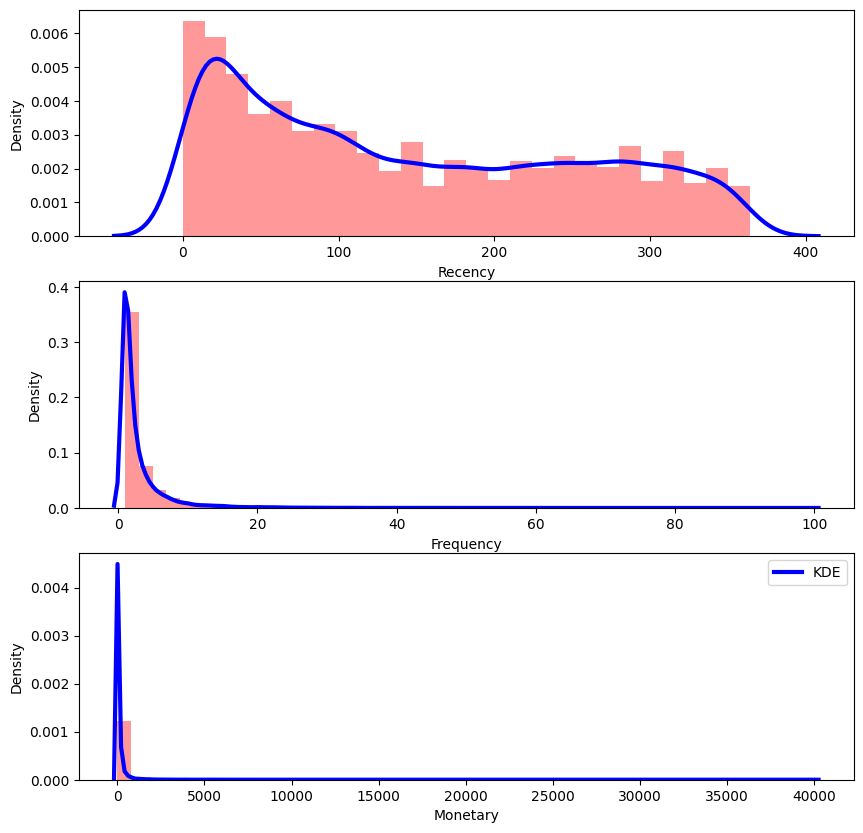

In [51]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.distplot(rfm['Recency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,2)
sns.distplot(rfm['Frequency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,3)
sns.distplot(rfm['Monetary'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.legend()
plt.show()

In [52]:
clustering_rfm = rfm[['Recency',"Frequency","Monetary"]].copy()
clustering_rfm.head()

,Recency,Frequency,Monetary
Customer_ID,,,
1,344,1,16.29
2,195,2,22.77
3,334,1,19.08
4,54,2,33.29
5,120,5,248.27


In [54]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clustering_rfm)
data_scaled = pd.DataFrame(x_scaled,columns=['Recency','Frequency','Monetary'])
data_scaled

,Recency,Frequency,Monetary
0,0.945055,0.000000,0.000403
1,0.535714,0.010204,0.000565
2,0.917582,0.000000,0.000473
3,0.148352,0.010204,0.000827
4,0.329670,0.040816,0.006192
...,...,...,...
22620,0.219780,0.000000,0.000426
22621,0.041209,0.000000,0.000148
22622,0.027473,0.000000,0.005633
22623,0.887363,0.000000,0.000486


Gunakan ELbow methode untuk menentukan jumlah cluster.

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

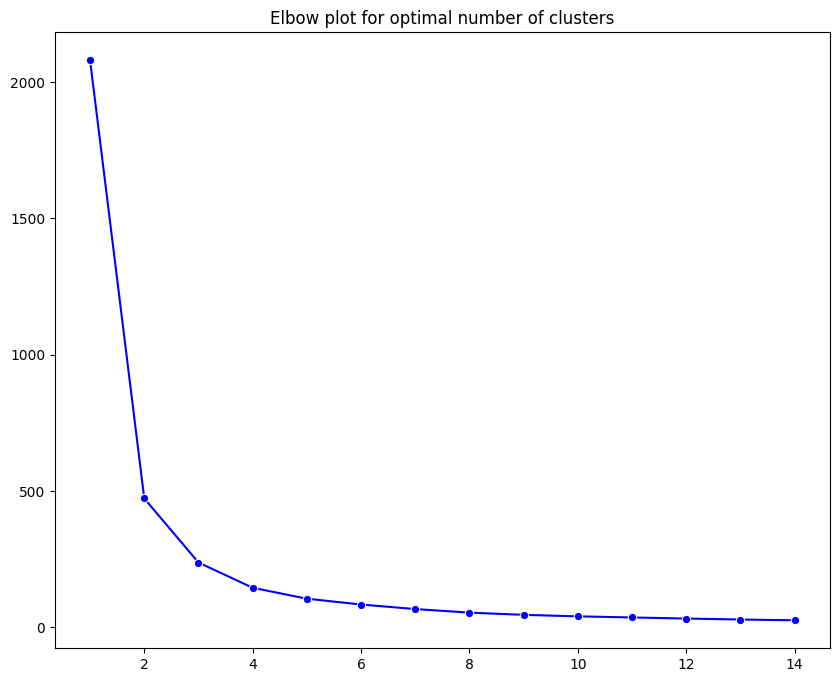

In [55]:
wscc = []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data_scaled)
    wscc.append(kmeans.inertia_)  

plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,15),y=wscc,marker="o",c='blue')
plt.title("Elbow plot for optimal number of clusters")

Berapa cluster yang akan dibentuk dari Elbow methode? buatlah clusternya!

In [56]:
kmeans = KMeans(n_clusters=3, random_state=0,init='k-means++',
                n_init =10,max_iter = 300).fit(data_scaled)
pred = kmeans.predict(data_scaled)
RFMScores['Cluster']=kmeans.labels_
RFMScores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score,Cluster
Customer_ID,,,,,,,,,
1,344,1,16.29,4,4,3,443,11,1
2,195,2,22.77,3,2,3,323,8,2
3,334,1,19.08,4,4,3,443,11,1
4,54,2,33.29,2,2,2,222,6,0
5,120,5,248.27,2,1,1,211,4,2
6,275,1,25.55,4,4,3,443,11,1
7,235,1,17.84,3,4,3,343,10,1
8,193,1,19.56,3,4,3,343,10,2
9,286,1,15.75,4,4,3,443,11,1


In [57]:
RFMScores.groupby('Cluster').mean().sort_values('Score',ascending=False)

,Recency,Frequency,Monetary,R,F,M,Score
Cluster,,,,,,,
1,293.578339,1.400000,56.048520,3.909609,3.477036,2.912704,10.299349
2,165.254866,1.927252,72.680872,2.843451,3.014022,2.661003,8.518476
0,44.411686,4.260098,189.559622,1.452845,2.292814,2.163772,5.909431


Bagaimana hasil pengelompokan pelanggan dari analisis yang telah dilakukan?

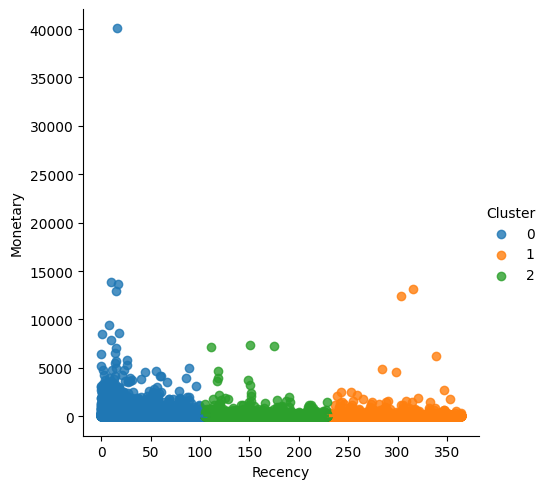

In [69]:
sns.lmplot(x='Recency', y='Monetary', data=RFMScores, hue='Cluster', fit_reg=True)

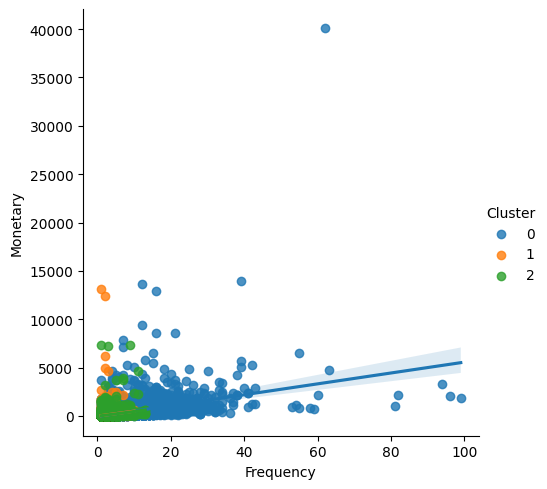

In [70]:
sns.lmplot(x='Frequency', y='Monetary', data=RFMScores, hue='Cluster', fit_reg=True)

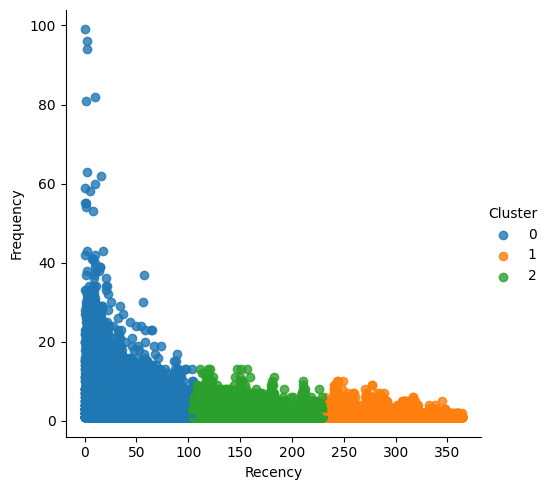

In [71]:
sns.lmplot(x='Recency', y='Frequency', data=RFMScores, hue='Cluster', fit_reg=True)

Cluster 0 adalah Cluster yang memiliki nilai recency 0-100 dengan frequency yang tinggi sampai diangka 100 serta monetary yang tinggi diangka 40000.


cluster 1 adalah Cluster yang memiliki nilai recency 230-360 serta memili frekuensi yang paling rendah diangka < 15 serta memiliki monetary maksimal diangka 15000


Cluster 2 adalah Cluster yang memiliki nilai recency 100-230 serta memiliki frekuensi yang rendah diangka < 20 serta memiliki monetary maksimal diangka 14000